FileNotFoundError: [Errno 2] No such file or directory: '/home/umar/Documents/uwaterloo/4b/capstone_firefly/FireFly/deep_learning/datasets/random_test_imgs/ir_test_2/csv/ir_4.csv'

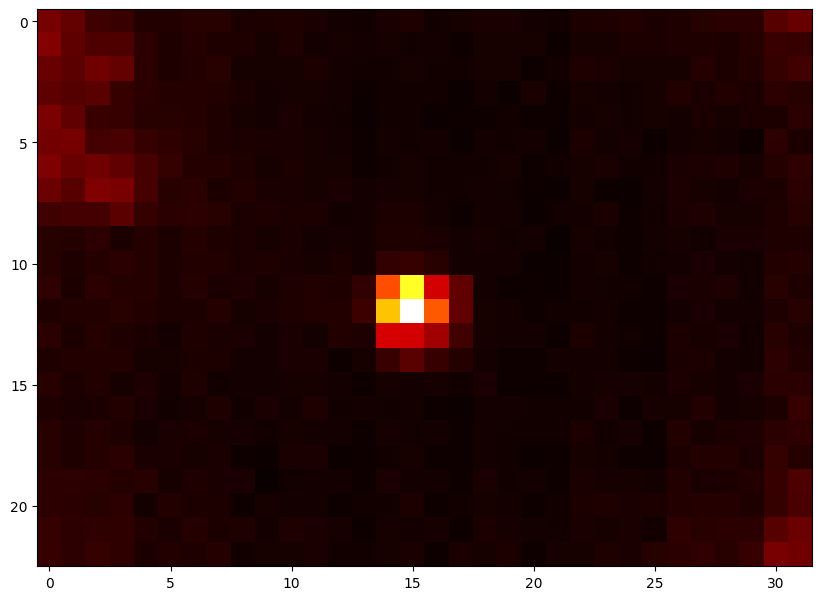

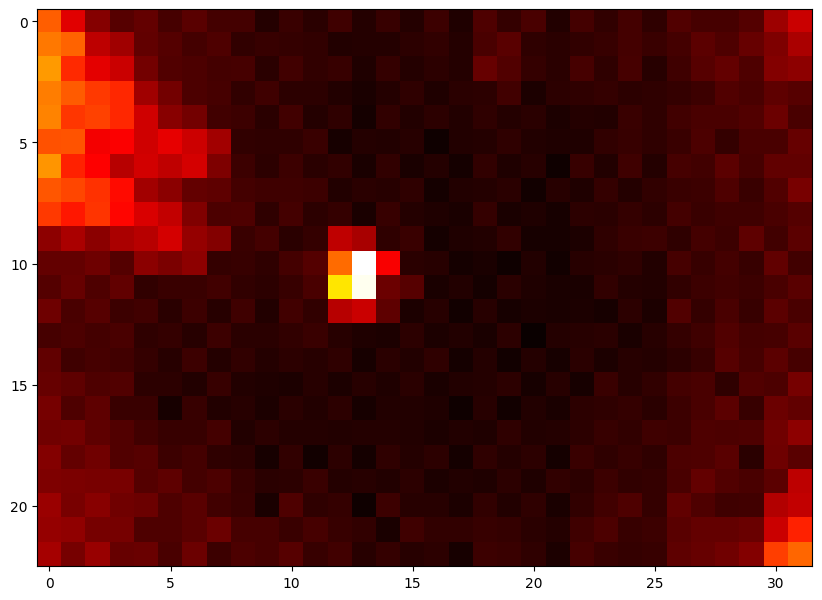

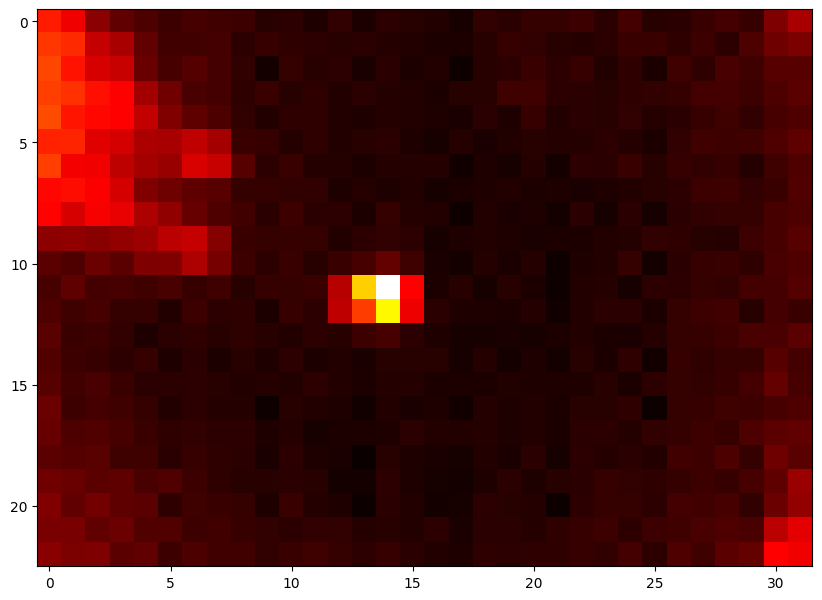

In [19]:
import pandas as pd
# import seaborn as sns
import os
import matplotlib.pyplot as plt

base_dir = "/home/umar/Documents/uwaterloo/4b/capstone_firefly/FireFly/deep_learning/datasets/random_test_imgs/ir_test_2/csv/"
ir_img_list = [os.path.join(base_dir, i) for i in os.listdir(base_dir) if i.endswith(".png")]

for i in range(1,11):
    
    # filename = f"/home/umar/Documents/uwaterloo/4b/capstone_firefly/FireFly/drone/server/test_data/match_data/data{i}.csv"
    thermal_df = pd.read_csv(filename)
    thermal_np = thermal_df.to_numpy()
    thermal_np[5][0] = int((thermal_np[5][1] + thermal_np[4][0] + thermal_np[6][0]) / 3)
    # thermal_np[18][3] = int((thermal_np[18][2] + thermal_np[18][4] + thermal_np[17][3] + thermal_np[19][3]) / 4)
    thermal_np = (thermal_np - thermal_np.mean()) / thermal_np.std()
    
    # show dataframe using matplotlib
    plt.figure(figsize=(10,10))
    plt.imshow(thermal_np, cmap='hot', interpolation='nearest')
    # g = sns.heatmap(thermal_df)
    # g.set_title(filename)
    # plt.tight_layout()
    # plt.show()

[INFO]: filename: match_data/data1.csv


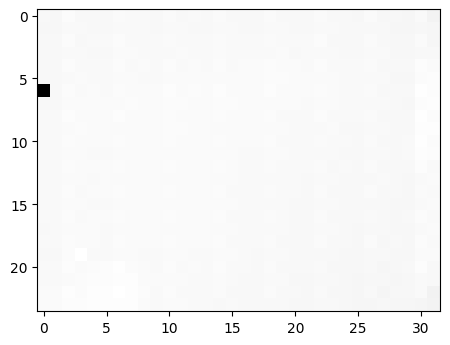

[INFO]: filename: data1.csv


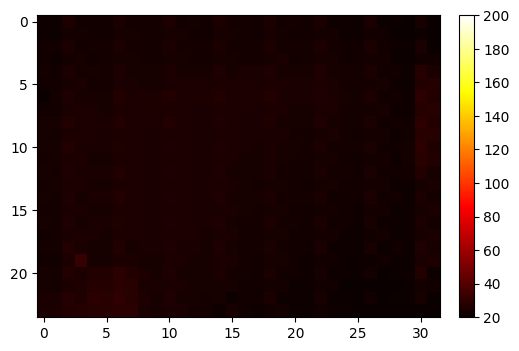

[INFO]: filename: match_data/data2.csv


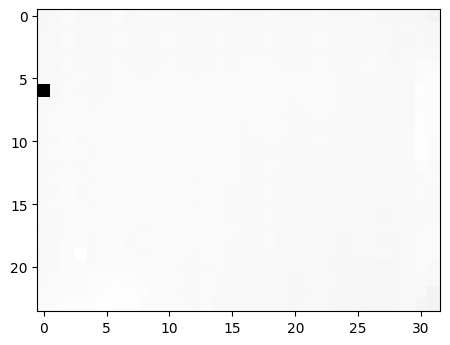

[INFO]: filename: data2.csv


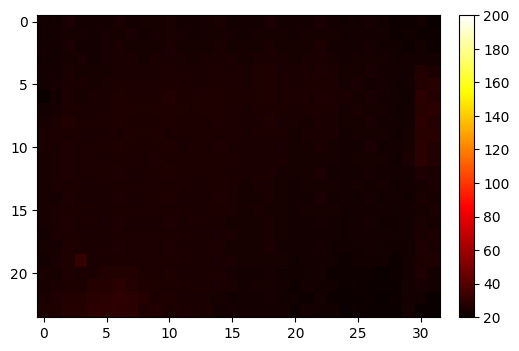

[INFO]: filename: match_data/data3.csv


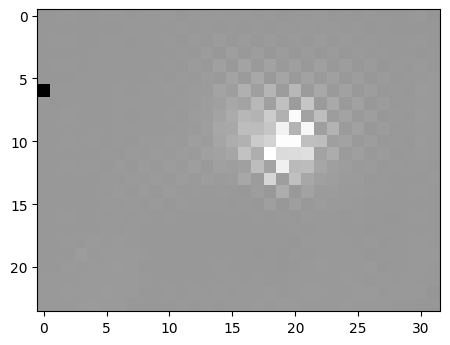

[INFO]: filename: data3.csv


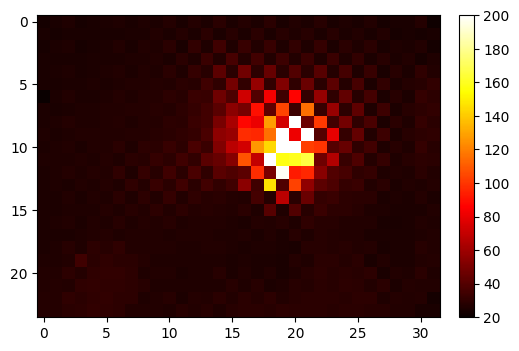

[INFO]: filename: match_data/data4.csv


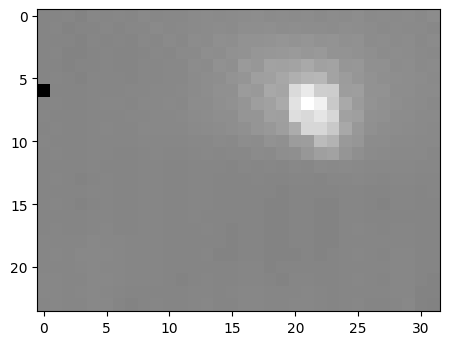

[INFO]: filename: data4.csv


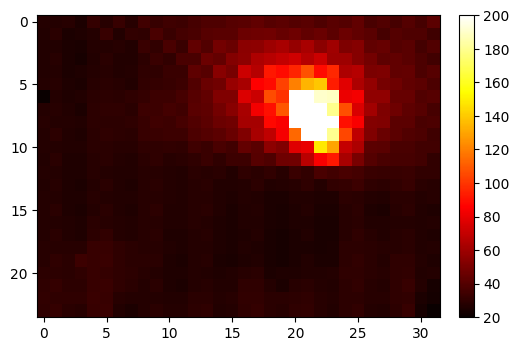

[INFO]: filename: match_data/data5.csv


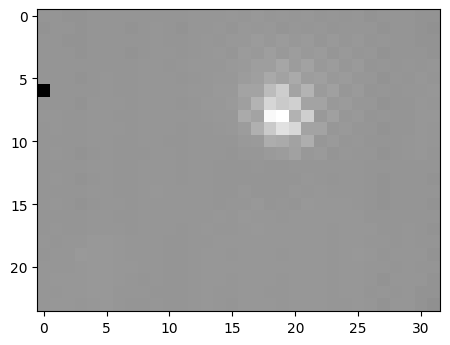

[INFO]: filename: data5.csv


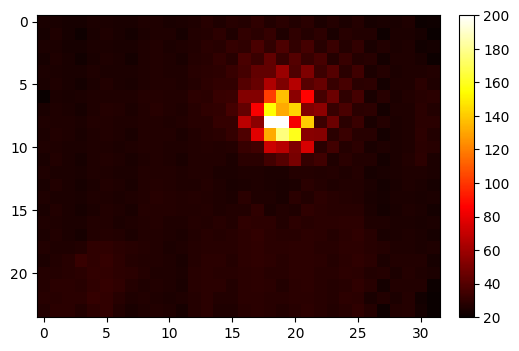

[INFO]: filename: match_data/data6.csv


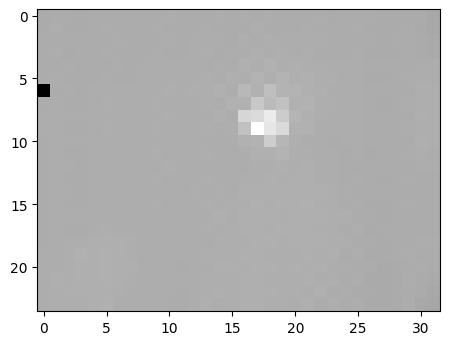

[INFO]: filename: data6.csv


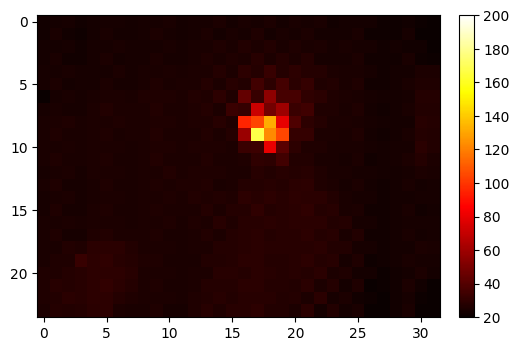

[INFO]: filename: match_data/data7.csv


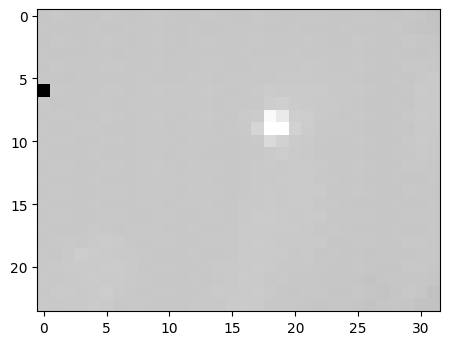

[INFO]: filename: data7.csv


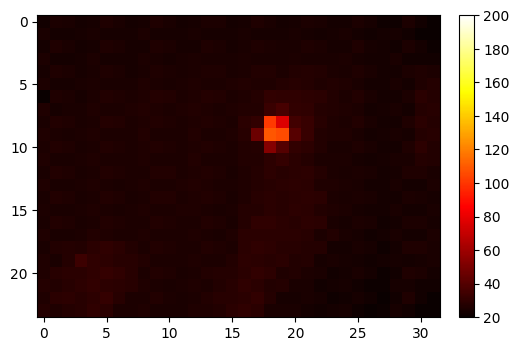

[INFO]: filename: match_data/data8.csv


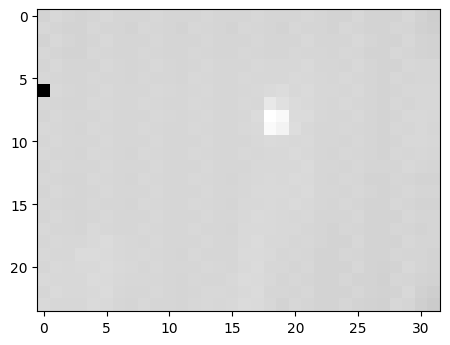

[INFO]: filename: data8.csv


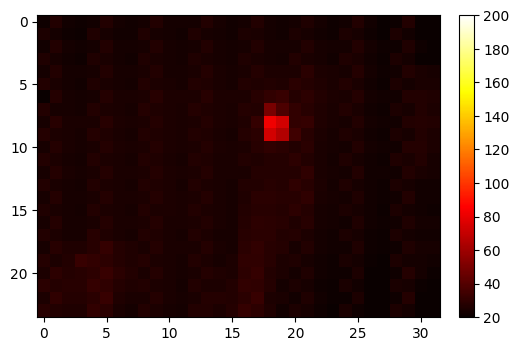

[INFO]: filename: match_data/data9.csv


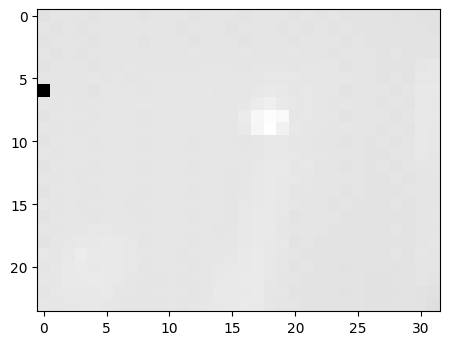

[INFO]: filename: data9.csv


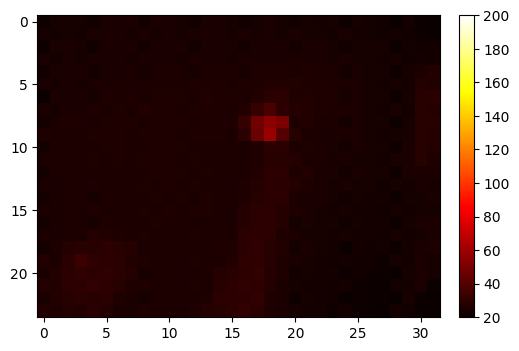

[INFO]: filename: match_data/data10.csv


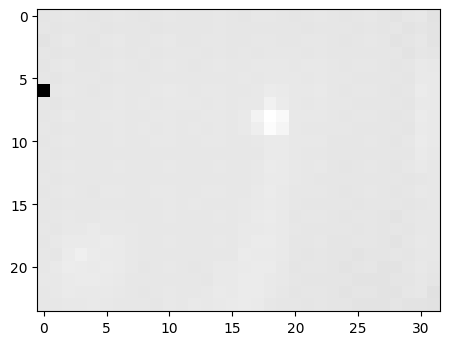

[INFO]: filename: data10.csv


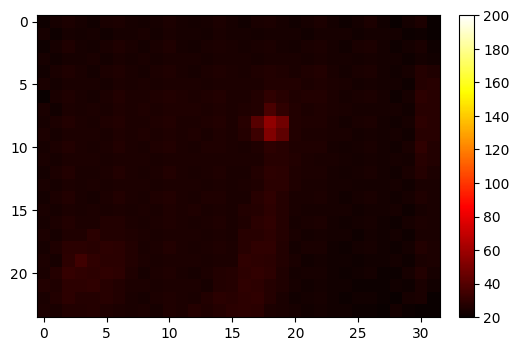

In [10]:
import cv2
from plantcv import plantcv as pcv

class options:
    def __init__(self, filename):
        self.image = filename
        self.debug = "plot"
        self.writeimg= False
        self.result = "thermal_tutorial_results.txt"
        self.outdir = "."
        
for i in range(1,11):
    filename = f"match_data/data{i}.csv"
    # Get options
    args = options(filename)
    # Set debug to the global parameter 
    pcv.params.debug = args.debug
    print(f"[INFO]: filename: {filename}")
    thermal_data, path, filename = pcv.readimage(filename=args.image, mode='csv')
    print(f"[INFO]: filename: {filename}")
    # other colormap: "hot", "jet" (is bad)
    pseudo_img = pcv.visualize.pseudocolor(gray_img = thermal_data, cmap='hot', min_value=20, max_value=200)



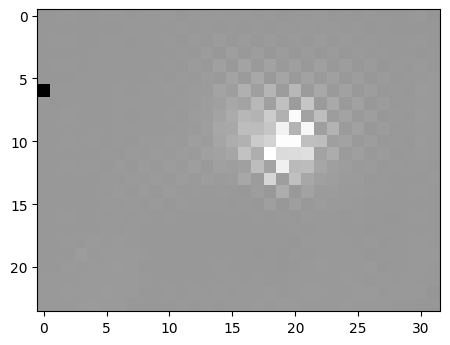

In [87]:
# Read image

# Inputs:
#   filename - Image file to be read in 
#   mode - How to read in the image; either 'native' (default), 'rgb', 'gray', or 'csv'
thermal_data, path, filename = pcv.readimage(filename=args.image, mode='csv')
# Pseudocolor the thermal data 

# Inputs:
#     gray_img - Grayscale image data
#     obj - Single or grouped contour object (optional), if provided the pseudocolored image gets 
#           cropped down to the region of interest.
#     mask - Binary mask (optional) 
#     background - Background color/type. Options are "image" (gray_img, default), "white", or "black". A mask 
#                  must be supplied.
#     cmap - Colormap
#     min_value - Minimum value for range of interest
#     max_value - Maximum value for range of interest
#     dpi - Dots per inch for image if printed out (optional, if dpi=None then the default is set to 100 dpi).
#     axes - If False then the title, x-axis, and y-axis won't be displayed (default axes=True).
#     colorbar - If False then the colorbar won't be displayed (default colorbar=True)
pseudo_img = pcv.visualize.pseudocolor(gray_img = thermal_data, cmap='hot', 
                                       min_value=20, max_value=170)

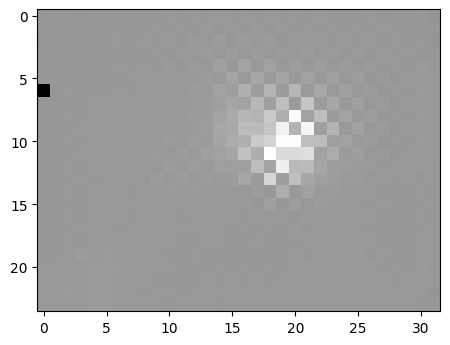

In [88]:
# Rescale the thermal data to a colorspace with range 0-255 rather than raw data 
    
# Inputs:
#   gray_img - Grayscale image data 
#   min_value - New minimum value for range of interest. default = 0
#   max_value - New maximum value for range of interest. default = 255
scaled_thermal_img = pcv.transform.rescale(gray_img=thermal_data)

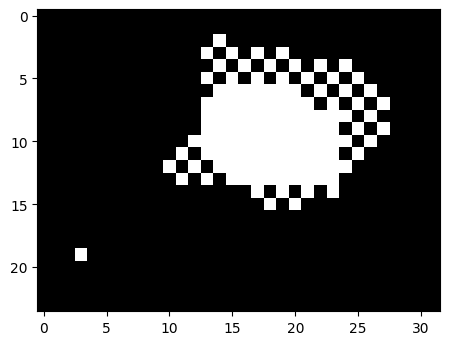

In [89]:
# Threshold the thermal data to make a binary mask
    
# Inputs:
#   gray_img - Grayscale image data 
#   threshold- Threshold value (between 0-255)
#   max_value - Value to apply above threshold (255 = white) 
#   object_type - 'light' (default) or 'dark'. If the object is lighter than the background then standard 
#                 threshold is done. If the object is darker than the background then inverse thresholding is done. 
bin_mask = pcv.threshold.binary(gray_img=thermal_data, threshold=33, max_value=155, object_type='light')

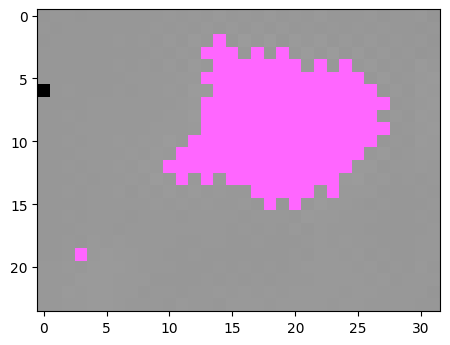

In [90]:
# Identify objects
    
# Inputs: 
#   img - RGB or grayscale image data for plotting 
#   mask - Binary mask used for detecting contours 
id_objects, obj_hierarchy = pcv.find_objects(img=scaled_thermal_img, mask=bin_mask)

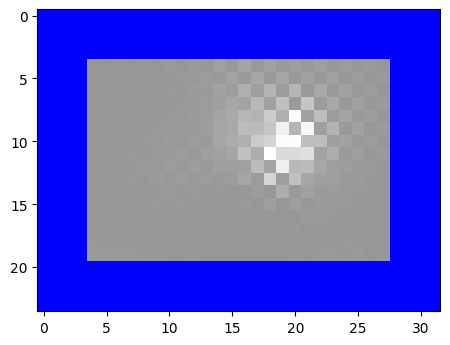

In [91]:
# Define the region of interest (ROI) 

# Inputs: 
#   img - RGB or grayscale image to plot the ROI on 
#   x - The x-coordinate of the upper left corner of the rectangle 
#   y - The y-coordinate of the upper left corner of the rectangle 
#   h - The height of the rectangle 
#   w - The width of the rectangle 
roi, roi_hierarchy= pcv.roi.rectangle(img=scaled_thermal_img, x=0, y=0, h=24, w=32)

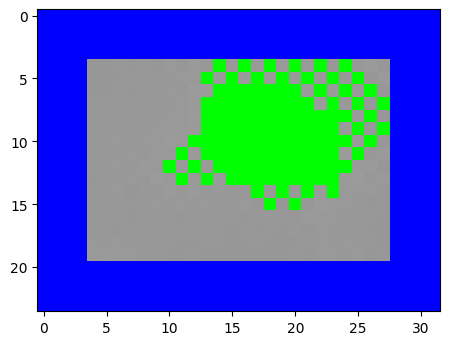

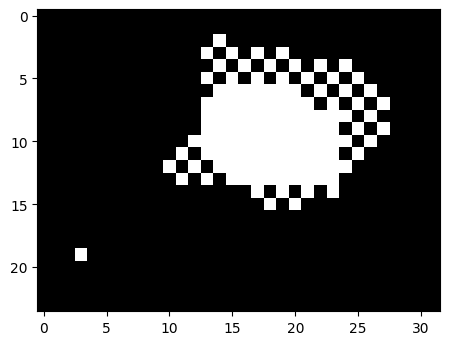

In [92]:
# Decide which objects to keep

# Inputs:
#    img            = img to display kept objects
#    roi_contour    = contour of roi, output from any ROI function
#    roi_hierarchy  = contour of roi, output from any ROI function
#    object_contour = contours of objects, output from pcv.find_objects function
#    obj_hierarchy  = hierarchy of objects, output from pcv.find_objects function
#    roi_type       = 'partial' (default, for partially inside the ROI), 'cutto', or 
#                     'largest' (keep only largest contour)

roi_objects, hierarchy, kept_mask, obj_area = pcv.roi_objects(img=scaled_thermal_img,roi_contour=roi,
                                                              roi_hierarchy=roi_hierarchy,
                                                              object_contour=id_objects,
                                                              obj_hierarchy=obj_hierarchy, 
                                                              roi_type='cutto')

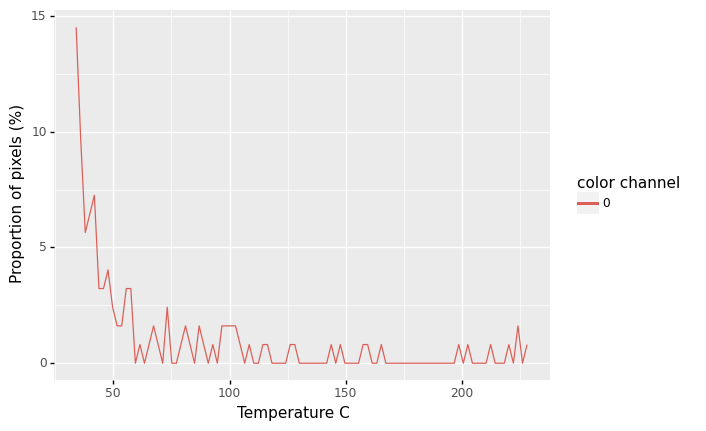

In [93]:
##### Analysis #####

# Analyze thermal data 

# Inputs:
#   img - Array of thermal values
#   mask - Binary mask made from selected contours
#   histplot - If True plots histogram of intensity values (default histplot = False)
#   label - Optional label parameter, modifies the variable name of observations recorded. (default `label="default"`)filled_img = pcv.morphology.fill_segments(mask=cropped_mask, objects=edge_objects)

analysis_img = pcv.analyze_thermal_values(thermal_array=thermal_data, mask=kept_mask, histplot=True, label="default")

In [1]:
# Pseudocolor the thermal data 

# Inputs:
#     gray_img - Grayscale image data
#     obj - Single or grouped contour object (optional), if provided the pseudocolored image gets 
#           cropped down to the region of interest.
#     mask - Binary mask (optional) 
#     background - Background color/type. Options are "image" (gray_img, default), "white", or "black". A mask 
#                  must be supplied.
#     cmap - Colormap
#     min_value - Minimum value for range of interest
#     max_value - Maximum value for range of interest
#     dpi - Dots per inch for image if printed out (optional, if dpi=None then the default is set to 100 dpi).
#     axes - If False then the title, x-axis, and y-axis won't be displayed (default axes=True).
#     colorbar - If False then the colorbar won't be displayed (default colorbar=True)
pseudo_img = pcv.visualize.pseudocolor(gray_img = thermal_data, cmap='hot', 
                                       min_value=20, max_value=170)

NameError: name 'pcv' is not defined